Lambda School Data Science

*Unit 2, Sprint 1, Module 1*

---

# Regression 1

## Assignment - - 

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.

The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

If your **Plotly** visualizations aren't working:
- You must have JavaScript enabled in your browser
- You probably want to use Chrome or Firefox
- You may need to turn off ad blockers
- [If you're using Jupyter Lab locally, you need to install some "extensions"](https://plot.ly/python/getting-started/#jupyterlab-support-python-35)

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [1]:
import sys

DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [9]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

In [15]:
pd.set_option('display.max_columns', 100)

In [81]:
# Remove outliers: 
# the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
        (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
        (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]

In [82]:
df.describe()

,bathrooms,bedrooms,latitude,longitude,price,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
count,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000
mean,1.201610,1.537149,40.750756,-73.972757,3579.560563,0.524817,0.478256,0.478276,0.447610,0.424832,0.415081,0.367085,0.052769,0.268431,0.185653,0.175902,0.132761,0.138394,0.102833,0.087203,0.060471,0.055206,0.051908,0.046193,0.043305,0.042711,0.039331,0.027224,0.026241
std,0.469025,1.106087,0.038962,0.028887,1762.438925,0.499389,0.499532,0.499533,0.497253,0.494322,0.492741,0.482015,0.223573,0.443148,0.388830,0.380741,0.339320,0.345317,0.303744,0.282136,0.238359,0.228385,0.221844,0.209905,0.203544,0.202206,0.194382,0.162738,0.159852
min,0.000000,0.000000,40.571200,-74.087300,1375.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,40.728300,-73.991800,2500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,40.751700,-73.978000,3150.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,2.000000,40.774000,-73.955000,4095.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,8.000000,40.989400,-73.700100,15500.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [83]:
## (When I first plotted below, there was one distracting 10-bath outlier.
## I remove that here.)

df = df[df['bathrooms'] < 10]

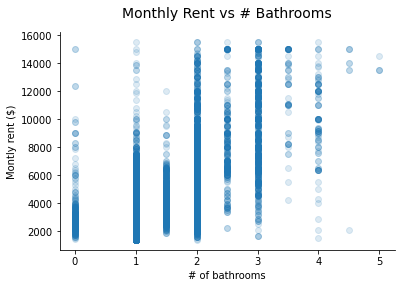

In [84]:
## Most of the columns are boolean (shown by max and min being 1 and 0).
## Let's plot price against number of bathrooms.

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(df['bathrooms'], df['price'], alpha=.15)

ax.set_title('Monthly Rent vs # Bathrooms', fontsize=14, y=1.04)

ax.set_xlabel('# of bathrooms')
ax.set_ylabel('Montly rent ($)')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

In [85]:
## There's clearly a relationship here. Let's try making a model from
## only bathroom count.

X = df[['bathrooms']]
y = df['price']

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

model = LinearRegression()
model.fit(X=X, y=y)

LinearRegression()

In [87]:
y_pred = model.predict(X)

In [88]:
y_pred

array([4352.95967496, 3057.00579268, 3057.00579268, ..., 3057.00579268,
       3057.00579268, 3057.00579268])

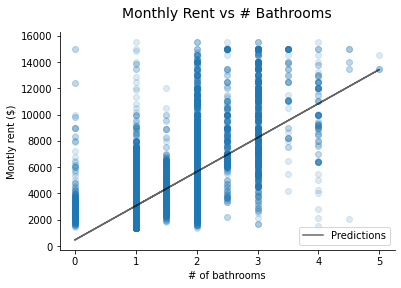

In [89]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(df['bathrooms'], df['price'], alpha=.15)
model1 = ax.plot(X, y_pred, color='black', alpha=.6)

ax.set_title('Monthly Rent vs # Bathrooms', fontsize=14, y=1.04)

ax.set_xlabel('# of bathrooms')
ax.set_ylabel('Montly rent ($)')
ax.legend(model1, ['Predictions'])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

In [90]:
mean_absolute_error(y, y_pred)

889.444227978281

In [91]:
## Ok. Let's see if, by adding bedroom count to our model,
## we can reduce our mean absolute error.

X = df[['bathrooms', 'bedrooms']]

model = LinearRegression()
model.fit(X=X, y=y)

y_pred = model.predict(X)

mean_absolute_error(y, y_pred)

821.9043368959562

In [92]:
## Not bad! I don't think this will be helpful, but let's see
## if these boolean features can do anything.

X = df[['bathrooms', 'bedrooms', 'cats_allowed']]

model = LinearRegression()
model.fit(X=X, y=y)

y_pred = model.predict(X)

mean_absolute_error(y, y_pred)

818.5687341446536

In [93]:
## Tiny improvement. Just for fun, let's iterate through
## the boolean features and see which one of them does the
## most good for our model.

bool_feats = df.loc[:,'elevator':].columns
MAEs = []

for feat in bool_feats:
    X = df[['bathrooms', 'bedrooms', feat]]

    model = LinearRegression()
    model.fit(X=X, y=y)

    y_pred = model.predict(X)

    MAEs.append(mean_absolute_error(y, y_pred))
    
    
df_bool_errors = pd.DataFrame({'feat':bool_feats, 'MAE':MAEs})
    
df_bool_errors.sort_values(by='MAE').head()

,feat,MAE
4,doorman,774.936165
0,elevator,794.977815
8,fitness_center,796.816643
10,laundry_in_unit,813.383256
5,dishwasher,813.928238


In [94]:
## There you have it! The doorman's presence is the most important boolean
## predictor of rental price.

## What if we added those first three boolean features? What would our
## error be then?

X = df[['bathrooms', 'bedrooms', 'doorman', 'elevator', 'fitness_center']]

model = LinearRegression()
model.fit(X=X, y=y)

y_pred = model.predict(X)

mean_absolute_error(y, y_pred)

772.7191983376676

In [97]:
## Hardly better than with only the doorman. Let's revert.

X = df[['bathrooms', 'bedrooms', 'doorman']]

model = LinearRegression()
model.fit(X=X, y=y)

y_pred = model.predict(X)


## And check out the coefficients.

print('coefficients:\t', model.coef_)
print('intercept:\t', model.intercept_)

coefficients:	 [1922.17745075  440.52489021  744.86657286]
intercept:	 276.2575706300131


In [100]:
## Let's explain these coefficients. The first one means that for
## every added bathroom, the monthly price prediction goes up by 
## $1922. For every added bedroom, it goes up by $441. The presence
## of a doorman singlehandedly raises the monthly price prediction
## by $745!

## Now we can make our own function using these coefficients.

def rent_predict(bathrooms, bedrooms, doorman):
    price = 276.26 + 1922.18*bathrooms + 440.52*bedrooms + 744.87*doorman
    return price

In [103]:
## When we run mean_absolute_error() on our y_pred from the sklearn
## model compared to predictions from this homemade function, the
## result should be just about zero.

homemade_pred = rent_predict(X['bathrooms'], X['bedrooms'], X['doorman'])

mean_absolute_error(y_pred, homemade_pred)

0.004197762140826416

In [104]:
## Nice. How much would a studio apartment with a doorman cost?

rent_predict(1, 0, 1)

2943.31

In [ ]:
## Yikes.